In [125]:
import pandas as pd
import plotly.graph_objects as go

In [126]:
file_import_tiv = "./import-export-values_1950-2024.csv"
file_export_tiv = "./import-export-values_1950-2024_1950-2024.csv"
file_trade_register = "./trade-register.csv"

In [127]:
df_all = pd.read_csv(file_trade_register, skiprows=11, sep=',', encoding='ISO-8859-1')   #11, 8
df_all['Year of order'] = df_all['Year of order'].astype(int)
df_all['Year of order'] = pd.to_numeric(df_all['Year of order'], errors='coerce')

# df_all.sample(3)

In [128]:
brics_countries = ["Brazil", 'China', "India","Russia", "South Africa", "Egypt", "Ethiopia", "Iran", 'UAE']


In [107]:
df_brics_imp_from_world = df_all.query('Recipient in @brics_countries')
df_brics_exp_to_world = df_all.query('Supplier in @brics_countries')

df_brics_imp_from_brics = df_all.query('Recipient in @brics_countries & Supplier in@brics_countries ')
df_brics_exp_to_brics = df_all.query('Supplier in @brics_countries & Recipient in@brics_countries')


#df_brics_imp_from_world.groupby(['Year of order', 'Recipient'])['SIPRI TIV for total order'].sum().reset_index()

In [108]:
#df_brics_imp.query("Supplier == 'United States' & `Year of order` > 1990").sort_values(by=['Supplier', 'Weapon designation']).tail(30)


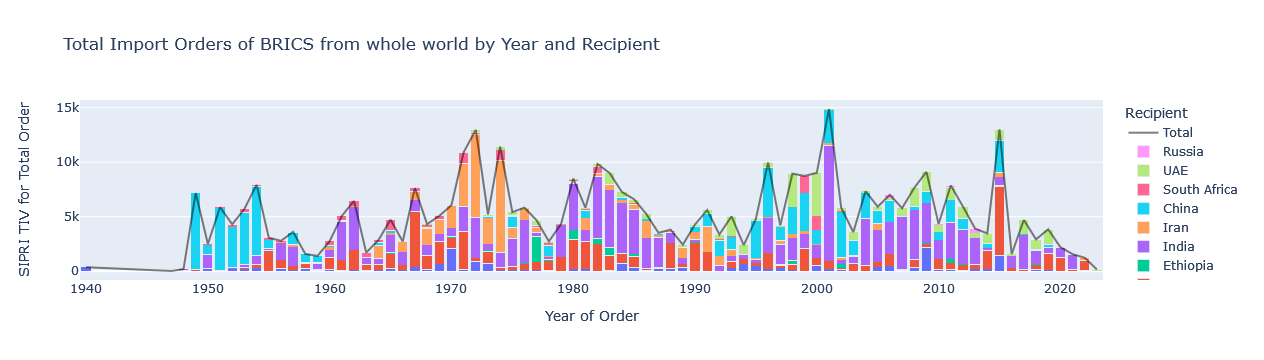

In [131]:


# Group and sum the data
grouped_df = df_brics_imp_from_world.groupby(['Year of order', 'Recipient'])['SIPRI TIV for total order'].sum().reset_index()

# Create a list of unique years and recipients
years = grouped_df['Year of order'].unique()
recipients = grouped_df['Recipient'].unique()

# Create a pivot table for easier plotting
pivot_df = grouped_df.pivot(index='Year of order', columns='Recipient', values='SIPRI TIV for total order').fillna(0)

# Create a stacked bar chart
fig = go.Figure()

# Add bars for each recipient
for recipient in recipients:
    fig.add_trace(go.Bar(
        x=pivot_df.index,
        y=pivot_df[recipient],
        name=recipient
    ))

# Add total values
total_values = pivot_df.sum(axis=1)
fig.add_trace(go.Scatter(
    x=pivot_df.index,
    y=total_values,
    name='Total',
    marker_color='black',
    opacity=0.5
))

# Update layout
fig.update_layout(
    title='Total Import Orders of BRICS from whole world by Year and Recipient',
    xaxis_title='Year of Order',
    yaxis_title='SIPRI TIV for Total Order',
    barmode='stack',
    legend_title='Recipient'
)

# Show the figure
fig.show()


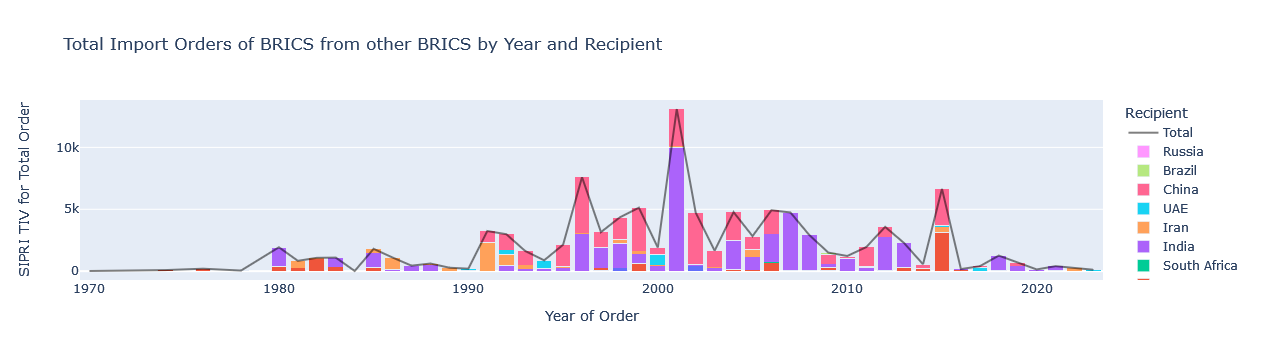

In [132]:
import plotly.graph_objects as go
import pandas as pd

# Group and sum the data
grouped_df = df_brics_imp_from_brics.groupby(['Year of order', 'Recipient'])['SIPRI TIV for total order'].sum().reset_index()

# Create a list of unique years and recipients
years = grouped_df['Year of order'].unique()
recipients = grouped_df['Recipient'].unique()

# Create a pivot table for easier plotting
pivot_df = grouped_df.pivot(index='Year of order', columns='Recipient', values='SIPRI TIV for total order').fillna(0)

# Create a stacked bar chart
fig = go.Figure()

# Add bars for each recipient
for recipient in recipients:
    fig.add_trace(go.Bar(
        x=pivot_df.index,
        y=pivot_df[recipient],
        name=recipient
    ))

# Add total values
total_values = pivot_df.sum(axis=1)
fig.add_trace(go.Scatter(
    x=pivot_df.index,
    y=total_values,
    name='Total',
    marker_color='black',
    opacity=0.5
))

# Update layout
fig.update_layout(
    title='Total Import Orders of BRICS from other BRICS by Year and Recipient',
    xaxis_title='Year of Order',
    yaxis_title='SIPRI TIV for Total Order',
    barmode='stack',
    legend_title='Recipient'
)

# Show the figure
fig.show()


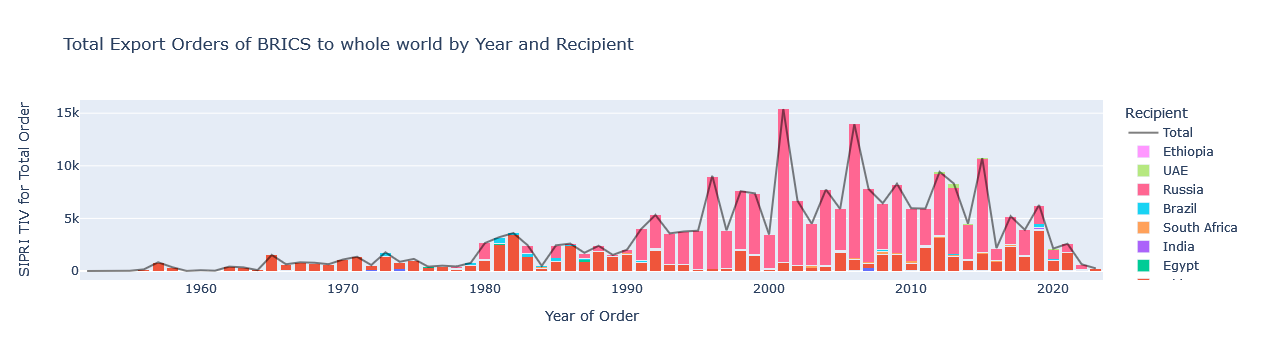

In [133]:

# Group and sum the data
grouped_df = df_brics_exp_to_world.groupby(['Year of order', 'Supplier'])['SIPRI TIV for total order'].sum().reset_index()

# Create a list of unique years and recipients
years = grouped_df['Year of order'].unique()
supplier = grouped_df['Supplier'].unique()

# Create a pivot table for easier plotting
pivot_df = grouped_df.pivot(index='Year of order', columns='Supplier', values='SIPRI TIV for total order').fillna(0)

# Create a stacked bar chart
fig = go.Figure()

# Add bars for each recipient
for recipient in supplier:
    fig.add_trace(go.Bar(
        x=pivot_df.index,
        y=pivot_df[recipient],
        name=recipient
    ))

# Add total values
total_values = pivot_df.sum(axis=1)
fig.add_trace(go.Scatter(
    x=pivot_df.index,
    y=total_values,
    name='Total',
    marker_color='black',
    opacity=0.5
))

# Update layout
fig.update_layout(
    title='Total Export Orders of BRICS to whole world by Year and Recipient',
    xaxis_title='Year of Order',
    yaxis_title='SIPRI TIV for Total Order',
    barmode='stack',
    legend_title='Recipient'
)

# Show the figure
fig.show()


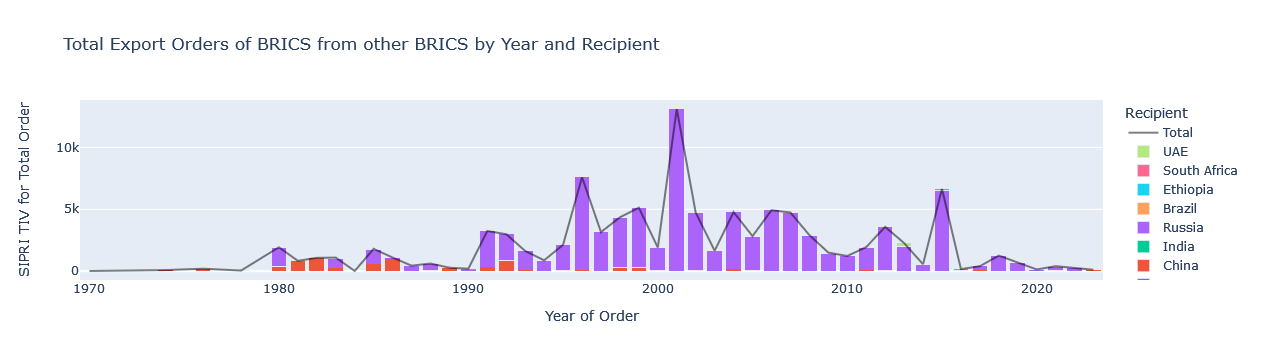

In [135]:
import plotly.graph_objects as go
import pandas as pd

# Group and sum the data
grouped_df = df_brics_exp_to_brics.groupby(['Year of order', 'Supplier'])['SIPRI TIV for total order'].sum().reset_index()

# Create a list of unique years and recipients
years = grouped_df['Year of order'].unique()
supplier = grouped_df['Supplier'].unique()

# Create a pivot table for easier plotting
pivot_df = grouped_df.pivot(index='Year of order', columns='Supplier', values='SIPRI TIV for total order').fillna(0)

# Create a stacked bar chart
fig = go.Figure()

# Add bars for each recipient
for recipient in supplier:
    fig.add_trace(go.Bar(
        x=pivot_df.index,
        y=pivot_df[recipient],
        name=recipient
    ))

# Add total values
total_values = pivot_df.sum(axis=1)
fig.add_trace(go.Scatter(
    x=pivot_df.index,
    y=total_values,
    name='Total',
    marker_color='black',
    opacity=0.5
))

# Update layout
fig.update_layout(
    title='Total Export Orders of BRICS from other BRICS by Year and Recipient',
    xaxis_title='Year of Order',
    yaxis_title='SIPRI TIV for Total Order',
    barmode='stack',
    legend_title='Recipient'
)

# Show the figure
fig.show()


In [136]:
# Calculate total imports and exports
total_imports_world = df_brics_imp_from_world['SIPRI TIV for total order'].sum()
total_exports_world = df_brics_exp_to_world['SIPRI TIV for total order'].sum()

total_imports_brics = df_brics_imp_from_brics['SIPRI TIV for total order'].sum()
total_exports_brics = df_brics_exp_to_brics['SIPRI TIV for total order'].sum()

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'Category': ['Imports from World', 'Exports to World', 'Imports from BRICS', 'Exports to BRICS'],
    'Total Value': [total_imports_world, total_exports_world, total_imports_brics, total_exports_brics]
})

# Calculate percentages
total_world_value = total_imports_world + total_exports_world
total_brics_value = total_imports_brics + total_exports_brics

summary_df['Percentage of Total'] = summary_df['Total Value'] / total_world_value * 100


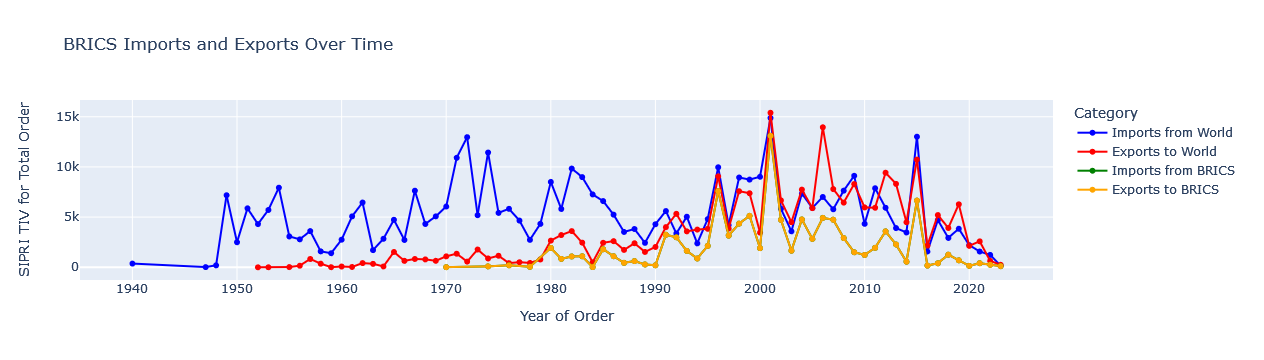

In [137]:
# Group by year and calculate total imports and exports
imports_world = df_brics_imp_from_world.groupby('Year of order')['SIPRI TIV for total order'].sum().reset_index()
exports_world = df_brics_exp_to_world.groupby('Year of order')['SIPRI TIV for total order'].sum().reset_index()
imports_brics = df_brics_imp_from_brics.groupby('Year of order')['SIPRI TIV for total order'].sum().reset_index()
exports_brics = df_brics_exp_to_brics.groupby('Year of order')['SIPRI TIV for total order'].sum().reset_index()

# Create the figure
fig = go.Figure()

# Add traces for each category
fig.add_trace(go.Scatter(
    x=imports_world['Year of order'],
    y=imports_world['SIPRI TIV for total order'],
    mode='lines+markers',
    name='Imports from World',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=exports_world['Year of order'],
    y=exports_world['SIPRI TIV for total order'],
    mode='lines+markers',
    name='Exports to World',
    line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=imports_brics['Year of order'],
    y=imports_brics['SIPRI TIV for total order'],
    mode='lines+markers',
    name='Imports from BRICS',
    line=dict(color='green')
))

fig.add_trace(go.Scatter(
    x=exports_brics['Year of order'],
    y=exports_brics['SIPRI TIV for total order'],
    mode='lines+markers',
    name='Exports to BRICS',
    line=dict(color='orange')
))

# Update layout
fig.update_layout(
    title='BRICS Imports and Exports Over Time',
    xaxis_title='Year of Order',
    yaxis_title='SIPRI TIV for Total Order',
    legend_title='Category',
    template='plotly'
)

# Show the figure
fig.show()

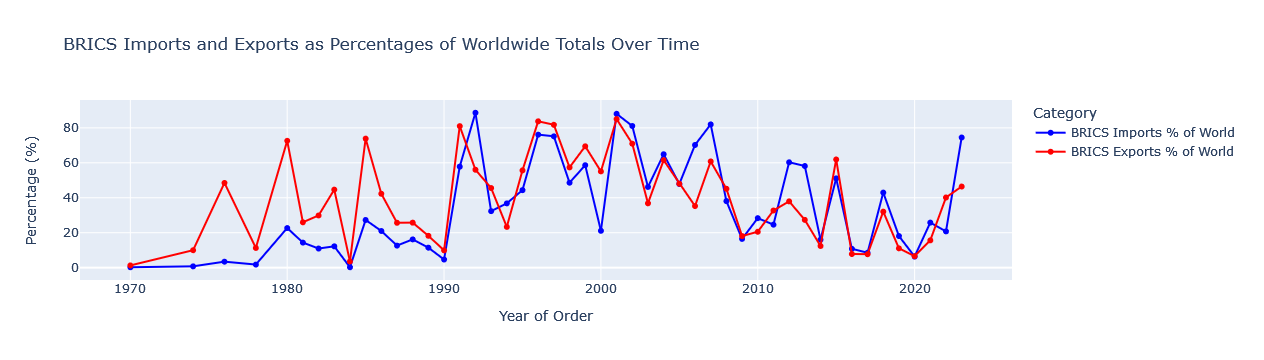

In [139]:

# Group by year and calculate total imports and exports for the world
imports_world = df_brics_imp_from_world.groupby('Year of order')['SIPRI TIV for total order'].sum().reset_index()
exports_world = df_brics_exp_to_world.groupby('Year of order')['SIPRI TIV for total order'].sum().reset_index()

# Group by year and calculate total imports and exports for BRICS
df_brics_imp_from_brics = df_all.query('Recipient in @brics_countries & Supplier in @brics_countries')
df_brics_exp_to_brics = df_all.query('Supplier in @brics_countries & Recipient in @brics_countries')

imports_brics = df_brics_imp_from_brics.groupby('Year of order')['SIPRI TIV for total order'].sum().reset_index()
exports_brics = df_brics_exp_to_brics.groupby('Year of order')['SIPRI TIV for total order'].sum().reset_index()

# Merge the data for percentage calculations
total_imports = imports_world.merge(imports_brics, on='Year of order', suffixes=('_world', '_brics'))
total_exports = exports_world.merge(exports_brics, on='Year of order', suffixes=('_world', '_brics'))

# Calculate percentages
total_imports['BRICS Imports %'] = (total_imports['SIPRI TIV for total order_brics'] / total_imports['SIPRI TIV for total order_world']) * 100
total_exports['BRICS Exports %'] = (total_exports['SIPRI TIV for total order_brics'] / total_exports['SIPRI TIV for total order_world']) * 100

# Create the figure
fig = go.Figure()

# Add traces for imports
fig.add_trace(go.Scatter(
    x=total_imports['Year of order'],
    y=total_imports['BRICS Imports %'],
    mode='lines+markers',
    name='BRICS Imports % of World',
    line=dict(color='blue')
))

# Add traces for exports
fig.add_trace(go.Scatter(
    x=total_exports['Year of order'],
    y=total_exports['BRICS Exports %'],
    mode='lines+markers',
    name='BRICS Exports % of World',
    line=dict(color='red')
))

# Update layout
fig.update_layout(
    title='BRICS Imports and Exports as Percentages of Worldwide Totals Over Time',
    xaxis_title='Year of Order',
    yaxis_title='Percentage (%)',
    legend_title='Category',
    template='plotly'
)

# Show the figure
fig.show()